<a href="https://colab.research.google.com/github/gianmaria99/Free-parking-slots-detection/blob/main/HDA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROVE CON DATASET SBAGLIATO** 

da non eseguire

In [ ]:
# import sys 
# sys.path.insert(0,'/content/drive/MyDrive/HDA_project')
# #from plots_utility import plt_doppler_antennas

**STEP 1**

python CSI_phase_sanitization_signal_preprocessing.py <'directory of the input data'> <'process all the files in subdirectories (1) or not (0)'> <'name of the file to process (only if 0 in the previous field)'> <'number of spatial streams'> <'number of cores'> <'index where to start the processing for each stream'> 

e.g., python CSI_phase_sanitization_signal_preprocessing.py ../input_files/S1a/ 1 - 1 4 0

done offline

**STEP 2**

python CSI_phase_sanitization_H_estimation.py <'directory of the input data'> <'process all the files in subdirectories (1) or not (0)'> <'name of the file to process (only if 0 in the previous field)'> <'number of spatial streams'> <'number of cores'> <'index where to start the processing for each stream'> <'index where to stop the processing for each stream'> 

e.g., python CSI_phase_sanitization_H_estimation.py ../input_files/S1a/ 0 S1a_E 1 4 0 -1

done offline

**STEP 3**

python CSI_phase_sanitization_signal_reconstruction.py <'directory of the processed data'> <'directory to save the reconstructed data'> <'number of spatial streams'> <'number of cores'> <'index where to start the processing for each stream'> <'index where to stop the processing for each stream'> 

e.g., python CSI_phase_sanitization_signal_reconstruction.py ./phase_processing/ ./processed_phase/ 1 4 0 -1

In [ ]:
#! python /content/drive/MyDrive/HDA_project/CSI_phase_sanitization_signal_reconstruction.py /content/drive/MyDrive/HDA_project/phase_processing/ /content/drive/MyDrive/HDA_project/processed_phase/ 1 4 0 -1

In [ ]:
# Tc = 6e-3
# fc = 5e9
# v_light = 3e8
# num_symbols = 31
# delta_v = round(v_light / (Tc * fc * num_symbols), 3)


# def plt_phase(phase_raw, phase_proc, name_plot):
#     fig = plt.figure(constrained_layout=True)
#     fig.set_size_inches(7, 3)
#     widths = [1, 0.3, 1, 0.3]
#     heights = [1]
#     gs = fig.add_gridspec(ncols=4, nrows=1, width_ratios=widths,  height_ratios=heights)
#     step_x = 5
#     ax = []

#     data_list = [phase_raw, phase_proc]
#     titles = [r'raw phase', r'sanitized phase']

#     for p_i in range(0, 4, 2):
#         ax1 = fig.add_subplot(gs[(0, p_i)])
#         a_i = int(p_i/2)
#         plt1 = ax1.pcolormesh(data_list[a_i], cmap='viridis', linewidth=0, rasterized=True)
#         plt1.set_edgecolor('face')
#         ax1.set_ylabel(r'sub-channel')
#         ax1.set_xlabel(r'time [s]')

#         ticks_y = np.asarray([0, 30, 60, 90, 122, 154, 184, 214, 244])
#         ax1.set_yticks(ticks_y + 0.5)
#         ax1.set_yticklabels(ticks_y - 122)
#         ticks_x = np.arange(0, data_list[a_i].shape[1] + 1, int(data_list[a_i].shape[1]/step_x))
#         ax1.set_xticks(ticks_x)
#         ax1.set_xticklabels(np.round(ticks_x * 6e-3, 2))

#         title_p = titles[a_i]
#         ax1.set_title(title_p)
#         ax.append(ax1)

#         axins = inset_axes(ax1,
#                            width="8%",  # width = 5% of parent_bbox width
#                            height="100%",  # height : 50%
#                            loc='lower left',
#                            bbox_to_anchor=(1.1, 0., 1, 1),
#                            bbox_transform=ax1.transAxes,
#                            borderpad=0,
#                            )
#         cbar1 = fig.colorbar(plt1, cax=axins)
#         cbar1.ax.set_ylabel('power [dB]')

#     for axi in ax:
#         axi.label_outer()
#     plt.savefig(name_plot, bbox_inches='tight')
#     plt.show()

# def plt_doppler_antennas(doppler_spectrum_list, sliding_lenght, delta_v, name_plot):
#     #if doppler_spectrum_list:
#         fig = plt.figure()
#         gs = gridspec.GridSpec(4, 1, figure=fig)
#         step = 15
#         length_v = mt.floor(doppler_spectrum_list[0].shape[1] / 2)
#         factor_v = step * (mt.floor(length_v / step))
#         ticks_y = np.arange(length_v - factor_v, length_v + factor_v + 1, step)
#         ticks_x = np.arange(0, doppler_spectrum_list[0].shape[0], int(doppler_spectrum_list[0].shape[0]/20))
#         ax = []

#         for p_i in range(len(doppler_spectrum_list)):
#             ax1 = fig.add_subplot(gs[(p_i, 0)])
#             plt1 = ax1.pcolormesh(doppler_spectrum_list[p_i].T, cmap='viridis', linewidth=0, rasterized=True)
#             plt1.set_edgecolor('face')
#             cbar1 = fig.colorbar(plt1)
#             cbar1.ax.set_ylabel('power [dB]', rotation=270, labelpad=14)
#             ax1.set_ylabel(r'velocity [m/s]')
#             ax1.set_xlabel(r'time [s]')
#             ax1.set_yticks(ticks_y + 0.5)
#             ax1.set_yticklabels(np.round((ticks_y - length_v) * delta_v, 2))
#             ax1.set_xticks(ticks_x)
#             ax1.set_xticklabels(np.round(ticks_x * sliding_lenght * 6e-3, 2))
#             ax.append(ax1)

#         for axi in ax:
#             axi.label_outer()
#         fig.set_size_inches(20, 10)
#         plt.savefig(name_plot, bbox_inches='tight')
#         plt.show()

# def load_data(csi_file_t):
#     csi_file = csi_file_t
#     if isinstance(csi_file_t, (bytes, bytearray)):
#         csi_file = csi_file.decode()
#     with open(csi_file, "rb") as fp:  # Unpickling
#         matrix_csi = pickle.load(fp)
#     matrix_csi = tf.transpose(matrix_csi, perm=[2, 1, 0])
#     matrix_csi = tf.cast(matrix_csi, tf.float32)
#     return matrix_csi

In [ ]:
# !pip install latex

In [ ]:
# import os
# import scipy.io as sio
# import pickle
# import tensorflow as tf

# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.gridspec as gridspec
# from matplotlib import rcParams
# import math as mt
# from tensorflow.python.ops.numpy_ops import np_config
# np_config.enable_numpy_behavior()
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes


# raw_dir = "/content/drive/MyDrive/HDA_project/phase_processing"
# all_files = os.listdir(raw_dir)
# mat_files = []
# names = []
# for i in range(len(all_files)):
#   if all_files[i].startswith('signal_AR1a_E'):
#       names.append(all_files[i])
# csi_matrices_raw = []
# for name in names:
#   name_file = '/content/drive/MyDrive/HDA_project/phase_processing/' + name 
#   csi_matrices_raw.append(load_data(name_file))
# print(csi_matrices_raw[0].shape)

# processed_dir = "/content/drive/MyDrive/HDA_project/processed_phase/AR1/"
# names = []
# all_files = os.listdir(processed_dir)
# for i in range(len(all_files)):
#   if all_files[i].startswith('AR1a_E'):
#     names.append(all_files[i][:-4])
# csi_matrices_processed = []
# for name in names:
#   print(name)
#   name_file = processed_dir + name + '.mat'
#   mdic = sio.loadmat(name_file)
#   csi_matrices_processed.append(mdic['csi_matrix_processed'])
# print(csi_matrices_processed[0].shape)


# plt_phase(tf.transpose(csi_matrices_raw[0][1,800:1300,:], perm=[1,0]),tf.transpose(csi_matrices_processed[1][800:1300,:,1], [1,0]),'prova')

**STEP 4**

compute doppler

python CSI_doppler_computation.py <'directory of the reconstructed data'> <'sub-directories of data'> <'directory to save the Doppler data'> <'starting index to process data'> <'end index to process data (samples from the end)'> <'number of packets in a sample'> <'number of packets for sliding operations'> <'noise level'> <--bandwidth 'bandwidth'>

e.g., python CSI_doppler_computation.py ./processed_phase/ S1a ./doppler_traces/ 800 800 31 1 -1.2

In [ ]:
# ! python /content/drive/MyDrive/HDA_project/CSI_doppler_computation.py /content/drive/MyDrive/HDA_project/processed_phase/ AR1 /content/drive/MyDrive/HDA_project/doppler_traces/ 800 800 31 1 -1.2 

In [ ]:
# dir = "/content/drive/MyDrive/HDA_project/doppler_traces/AR1/"
# all_files = os.listdir(dir)
# mat_files = []
# names = []
# for i in range(len(all_files)):
#   if all_files[i].startswith('AR1a_C'):
#       names.append(all_files[i])
# doppler_list = []
# for name in names:
#   name_file = dir + name 
#   print(name_file)
#   with open(name_file, "rb") as fp:  # Unpickling
#         temp = pickle.load(fp)
#   doppler_list.append(temp)
# print("SITTING DOWN/STANDING UP")
# plt_doppler_antennas(doppler_list, 1, delta_v, 'prova')

In [ ]:
# dir = "/content/drive/MyDrive/HDA_project/doppler_traces/AR1/"
# all_files = os.listdir(dir)
# mat_files = []
# names = []
# for i in range(len(all_files)):
#   if all_files[i].startswith('AR1a_W'):
#       names.append(all_files[i])
# doppler_list = []
# for name in names:
#   name_file = dir + name 
#   print(name_file)
#   with open(name_file, "rb") as fp:  # Unpickling
#         temp = pickle.load(fp)
#   doppler_list.append(temp)
# print("WALKING")
# plt_doppler_antennas(doppler_list, 1, delta_v, 'prova')

In [ ]:
# dir = "/content/drive/MyDrive/HDA_project/doppler_traces/AR1/"
# all_files = os.listdir(dir)
# mat_files = []
# names = []
# for i in range(len(all_files)):
#   if all_files[i].startswith('AR1a_R'):
#       names.append(all_files[i])
# doppler_list = []
# for name in names:
#   name_file = dir + name 
#   print(name_file)
#   with open(name_file, "rb") as fp:  # Unpickling
#         temp = pickle.load(fp)
#   doppler_list.append(temp)
# print("RUNNING")
# plt_doppler_antennas(doppler_list, 1, delta_v, 'prova')

In [ ]:
# dir = "/content/drive/MyDrive/HDA_project/doppler_traces/AR1/"
# all_files = os.listdir(dir)
# mat_files = []
# names = []
# for i in range(len(all_files)):
#   if all_files[i].startswith('AR1a_J1'):
#       names.append(all_files[i])
# doppler_list = []
# for name in names:
#   name_file = dir + name 
#   print(name_file)
#   with open(name_file, "rb") as fp:  # Unpickling
#         temp = pickle.load(fp)
#   doppler_list.append(temp)
# print("JUMP1")
# plt_doppler_antennas(doppler_list, 1, delta_v, 'prova')

In [ ]:
# dir = "/content/drive/MyDrive/HDA_project/doppler_traces/AR1/"
# all_files = os.listdir(dir)
# mat_files = []
# names = []
# for i in range(len(all_files)):
#   if all_files[i].startswith('AR1a_E'):
#       names.append(all_files[i])
# doppler_list = []
# for name in names:
#   name_file = dir + name 
#   print(name_file)
#   with open(name_file, "rb") as fp:  # Unpickling
#         temp = pickle.load(fp)
#   doppler_list.append(temp)
# print("EMPTY")
# plt_doppler_antennas(doppler_list, 1, delta_v, 'prova')

**STEP 5**

create dataset

python CSI_doppler_create_dataset_train.py <'directory of the Doppler data'> <'sub-directories, comma-separated'> <'number of packets in a sample'> <'number of packets for sliding operations'> <'number of samples per window'> <'number of samples for window sliding'> <'labels of the activities to be considered'> <'number of streams * number of antennas'>

e.g., python CSI_doppler_create_dataset_train.py ./doppler_traces/ S1a 31 1 340 30 E,L,W,R,J,C 4 

for test

e.g., python CSI_doppler_create_dataset_test.py ./doppler_traces/ S7a 31 1 340 30 E,L,W,R,J,C 4

In [ ]:
# ! python /content/drive/MyDrive/HDA_project/CSI_doppler_create_dataset_train.py /content/drive/MyDrive/HDA_project/doppler_traces/ AR1 31 1 340 30 C 4

In [ ]:
#OLD CRAP
# def preprocessing(dir_name, people=5):
#   """
#       performs basic preprocessing of the csi_buff
#       Phase sanitization to remove the phase shift according to the path
#       returns: None
#       saves complete preprocessed signal in .txt format
#       in directory ./phase_processing/

#       :param dir_name: path to the directory containing .mat files 
#       :param people: number of people on which to perform the identification, default 4 
#   """
#   # Generate the list of the .mat files present in the folder $dir_name 
#   names = {}
#   all_files = os.listdir(dir_name)
#   for f in all_files:
#       if (f.startswith('PI') and f.endswith('.mat')):
#         names[f[:-4]] = f
#   names_key = list(names.keys())
#   names_key.sort()
#   # for each file
#   for name in names_key[1:people+1]:
#       # Get the raw .mat file
#       csi, label = load_mat_file(name, os.path.join(dir_name, names[name]))

#       csi_buff = np.fft.fftshift(csi, axes=1)

#       delete_idxs = np.argwhere(np.sum(csi_buff, axis=1) == 0)[:, 0]
#       csi_buff = np.delete(csi_buff, delete_idxs, axis=0)

#       delete_idxs = np.asarray([0, 1, 2, 3, 4, 5, 127, 128, 129, 251, 252, 253, 254, 255], dtype=int)

#       n_ss = 1
#       n_core = 4
#       n_tot = n_ss * n_core

#       start = 1000
#       end = int(np.floor(csi_buff.shape[0]/n_tot))
#       signal_complete = np.zeros((csi_buff.shape[1] - delete_idxs.shape[0], end-start, n_tot), dtype=complex)

#       for stream in range(0, n_tot):
#           signal_stream = csi_buff[stream:end*n_tot + 1:n_tot, :][start:end, :]
#           signal_stream[:, 64:] = - signal_stream[:, 64:]

#           signal_stream = np.delete(signal_stream, delete_idxs, axis=1)
#           mean_signal = np.mean(np.abs(signal_stream), axis=1, keepdims=True)
#           H_m = signal_stream/mean_signal

#           signal_complete[:, :, stream] = H_m.T
      
#       name_file = './phase_processing/signal_' + name + '.txt'
#       with open(name_file, "wb") as fp:  # Pickling
#           pickle.dump(signal_complete, fp)

# def create_dataset(dir_name):
#   """
#       divides dataset in train, validation and test
#       returns: None
#       saves divided datasets in .txt format 
#       in directory ./phase_processing/dataset_txt
      
#       :param dir_name: path to the directory containing .txt files (preprocessing output)
#   """
#   sliding = 1 # Number of packets for sliding operations
#   num_packets = 31 # Number of packets in a sample
#   num_antennas = 4 # Number of antenna * number of spatial streams
#   input_network = (242, 666, 1) # (sample_length, feature_length, channels)
#   batch_size = 32
#   preprocessed_csi = []
#   lenghts = []
#   csi_train = []
#   csi_val = []
#   csi_test = []
#   length_train = []
#   length_val = []
#   length_test = []
#   train_labels = []
#   val_labels = []
#   test_labels = []

#   preprocessed_csi, labels, subdir = load_txt(dir_name)
#   for x in preprocessed_csi:
#     lenghts.append(x.shape[1])
  
#   dir_name = dir_name + 'datasets_txt/'
#   os.mkdir(dir_name)
#   lengths = np.asarray(lenghts)

#   people = []
#   for i,p in enumerate(labels):
#     print(p)
#     people.append(p) 
#     labels[i] = i
  
#   for i in labels:
#       ll = lenghts[i]
#       train_len = int(np.floor(ll*0.6))
#       length_train.append(train_len)
#       csi_train.append(preprocessed_csi[i][:,:train_len,:])

#       start_val = train_len + mt.ceil(num_packets/sliding)
#       val_len = int(np.floor(ll*0.2))
#       length_val.append(val_len)
#       csi_val.append(preprocessed_csi[i][:,start_val:start_val+val_len,:])

#       start_test = start_val + val_len + mt.ceil(num_packets/sliding)
#       length_test.append(ll-val_len-train_len-2*mt.ceil(num_packets/sliding))
#       csi_test.append(preprocessed_csi[i][:,start_test:,:])

#   list_sets_name = ['train', 'val', 'test']
#   list_sets = [csi_train, csi_val, csi_test]
#   list_sets_lengths = [length_train, length_val, length_test]
#   # list_data = []
#   # list_labels = []
#   list_windows = []

#   window_length = 400 # Number of samples per window
#   stride_length = 50  # Number of samples to stride
  
#   for set_name, set_, set_length in zip(list_sets_name, list_sets, list_sets_lengths):
#       list_windows.append(create_windows_delimiters(set_, labels, window_length, stride_length))
#       # csi_matrices_set, labels_set = create_windows_antennas(set_, labels, window_length,
#       #                                                                   stride_length, remove_mean=False)
#       # num_windows = np.floor((np.asarray(set_length) - window_length) / stride_length + 1)
#       # if not len(csi_matrices_set) == np.sum(num_windows):
#       #     print('ERROR - shapes mismatch ' + str(len(csi_matrices_set)) + " " + str(np.sum(num_windows))) 
#       # list_data.append(csi_matrices_set)
#       # list_labels.append(labels_set)

#       # names_set = []
#       # suffix = '.txt'
#       # os.mkdir(dir_name + set_name + '_antennas_' + subdir + '/')
#       # print(set_name + ' dataset:')
#       # for ii in trange(len(csi_matrices_set)):
#       #     name_file = dir_name + set_name + '_antennas_' + subdir + '/' + \
#       #                 str(ii) + suffix
#       #     names_set.append(name_file)
#       #     with open(name_file, "wb") as fp:  # Pickling
#       #         pickle.dump(csi_matrices_set[ii], fp)

#       # name_labels = dir_name + '/labels_' + set_name + '_antennas_' + subdir + suffix
#       # with open(name_labels, "wb") as fp:  # Pickling
#       #     pickle.dump(labels_set, fp)
#       # name_f = dir_name + '/files_' + set_name + '_antennas_' + subdir + suffix
#       # with open(name_f, "wb") as fp:  # Pickling
#       #     pickle.dump(names_set, fp)
#       # name_f = dir_name + '/num_windows_' + set_name + '_antennas_' + subdir + suffix
#       # with open(name_f, "wb") as fp:  # Pickling
#       #     pickle.dump(num_windows, fp)

  
#   name_base = 'csi_net'
#   name_cache = name_base + '_' + 'cache_train'
#   # dataset_csi_train = create_dataset_single(list_data[0], list_labels[0],
#   #                                             batch_size,
#   #                                             shuffle=True, cache_file=name_cache)
#   #csi, windows, labels, batch_size, shuffle, cache_file,
#   print(list_sets[0].shape, list_windows[0].shape, len(labels))
#   dataset_csi_train = create_dataset_s(list_sets[0], list_windows[0], labels,
#                                      batch_size, shuffle=True, cache_file=name_cache)

#   name_cache_val = name_base + '_cache_val'
#   # dataset_csi_val = create_dataset_single(list_data[1], list_labels[1],
#   #                                         batch_size,
#   #                                         shuffle=False, cache_file=name_cache_val)

#   name_cache_test = name_base + '_cache_test'
#   # dataset_csi_test = create_dataset_single(list_data[2], list_labels[2],
#   #                                           batch_size,
#   #                                           shuffle=False, cache_file=name_cache_test)
#   # info = {'num_samples_train': len(list_data[0]), 'num_samples_val': len(list_data[1]), 
#   #         'num_samples_test': len(list_data[2]), 'labels_train_selected_expanded': list_labels[0], 
#   #         'labels_val_selected_expanded': list_labels[1], 'labels_test_selected_expanded': list_labels[2],
#   #         'labels_considered':np.array(labels)}
#   return dataset_csi_train, dataset_csi_val, dataset_csi_test, info

# def load_dataset(dir_name, subdirs, people_string):
#   """
#       load dataset from its compressed version
#       returns: train, validation, test datasets
      
#       :param dir_name: path to the directory containing .txt files (create_dataset output)
#       :param subdirs: subdirs of the original dataset, comma-separated ex. "PI1,PI2"
#       :param people_string: people to be included in the dataset, index from 0 to 10 comma-separeted
#   """
#   feature_length = 666
#   sample_length = 242
#   channels = 1
#   batch_size = 32
#   num_tot = 4
#   bandwidth = 80
#   sub_band = 1
#   people = [] # selected people, indexed from 0 to 10

#   csi_act = ""
#   for p in people_string.split(','):
#     csi_act = csi_act + p 
#     people.append(int(p))

#   people = np.asarray(people)
#   gpus = tf.config.experimental.list_physical_devices('GPU')
#   print(gpus)

#   name_base = "net"
#   if os.path.exists(name_base + '_' + str(csi_act) + '_cache_train.data-00000-of-00001'):
#       os.remove(name_base + '_' + str(csi_act) + '_cache_train.data-00000-of-00001')
#       os.remove(name_base + '_' + str(csi_act) + '_cache_train.index')
#   if os.path.exists(name_base + '_' + str(csi_act) + '_cache_val.data-00000-of-00001'):
#       os.remove(name_base + '_' + str(csi_act) + '_cache_val.data-00000-of-00001')
#       os.remove(name_base + '_' + str(csi_act) + '_cache_val.index')
#   if os.path.exists(name_base + '_' + str(csi_act) + '_cache_train_test.data-00000-of-00001'):
#       os.remove(name_base + '_' + str(csi_act) + '_cache_train_test.data-00000-of-00001')
#       os.remove(name_base + '_' + str(csi_act) + '_cache_train_test.index')
#   if os.path.exists(name_base + '_' + str(csi_act) + '_cache_test.data-00000-of-00001'):
#       os.remove(name_base + '_' + str(csi_act) + '_cache_test.data-00000-of-00001')
#       os.remove(name_base + '_' + str(csi_act) + '_cache_test.index')
  
#   subdirs_training = subdirs  
#   labels_train = []
#   all_files_train = []
#   labels_val = []
#   all_files_val = []
#   labels_test = []
#   all_files_test = []
#   num_antennas = num_tot
#   input_shape = (num_antennas, sample_length, feature_length, channels)
#   input_network = (sample_length, feature_length, channels)
#   output_shape = people.shape[0]
#   labels_considered = np.arange(output_shape)
#   people = people[labels_considered]

#   suffix = '.txt'

#   for sdir in subdirs_training.split(','):
#       exp_save_dir = dir_name + '/'
#       dir_train = dir_name + '/train_antennas_' + sdir + '/'
#       name_labels = dir_name + '/labels_train_antennas_' + sdir + suffix
#       with open(name_labels, "rb") as fp:  # Unpickling
#           labels_train.extend(pickle.load(fp))
#       name_f = dir_name + '/files_train_antennas_' + sdir + suffix
#       with open(name_f, "rb") as fp:  # Unpickling
#           all_files_train.extend(pickle.load(fp))

#       dir_val = dir_name + '/val_antennas_' + sdir + '/'
#       name_labels = dir_name + '/labels_val_antennas_' + sdir + suffix
#       with open(name_labels, "rb") as fp:  # Unpickling
#           labels_val.extend(pickle.load(fp))
#       name_f = dir_name + '/files_val_antennas_' + sdir + suffix
#       with open(name_f, "rb") as fp:  # Unpickling
#           all_files_val.extend(pickle.load(fp))

#       dir_test = dir_name + '/test_antennas_' + sdir + '/'
#       name_labels = dir_name + '/labels_test_antennas_' + sdir + suffix
#       with open(name_labels, "rb") as fp:  # Unpickling
#           labels_test.extend(pickle.load(fp))
#       name_f = dir_name + '/files_test_antennas_' + sdir + suffix
#       with open(name_f, "rb") as fp:  # Unpickling
#           all_files_test.extend(pickle.load(fp))

#   file_train_selected = [all_files_train[idx] for idx in range(len(labels_train)) if labels_train[idx] in
#                           people]
#   labels_train_selected = [labels_train[idx] for idx in range(len(labels_train)) if labels_train[idx] in
#                             people]
#   file_train_selected_expanded, labels_train_selected_expanded, stream_ant_train = expand_antennas(file_train_selected, labels_train_selected, num_antennas)
#   name_cache = name_base + '_' + str(csi_act) + '_cache_train'
#   dataset_csi_train = create_dataset_single(file_train_selected_expanded, labels_train_selected_expanded,
#                                               stream_ant_train, input_network, batch_size,
#                                               shuffle=True, cache_file=name_cache)
  
#   file_val_selected = [all_files_val[idx] for idx in range(len(labels_val)) if labels_val[idx] in
#                          people]
#   labels_val_selected = [labels_val[idx] for idx in range(len(labels_val)) if labels_val[idx] in
#                           people]

#   file_val_selected_expanded, labels_val_selected_expanded, stream_ant_val = \
#       expand_antennas(file_val_selected, labels_val_selected, num_antennas)

#   name_cache_val = name_base + '_' + str(csi_act) + '_cache_val'
#   dataset_csi_val = create_dataset_single(file_val_selected_expanded, labels_val_selected_expanded,
#                                           stream_ant_val, input_network, batch_size,
#                                           shuffle=False, cache_file=name_cache_val)

#   file_test_selected = [all_files_test[idx] for idx in range(len(labels_test)) if labels_test[idx] in
#                         people]
#   labels_test_selected = [labels_test[idx] for idx in range(len(labels_test)) if labels_test[idx] in
#                           people]

#   file_test_selected_expanded, labels_test_selected_expanded, stream_ant_test = \
#       expand_antennas(file_test_selected, labels_test_selected, num_antennas)

#   name_cache_test = name_base + '_' + str(csi_act) + '_cache_test'
#   dataset_csi_test = create_dataset_single(file_test_selected_expanded, labels_test_selected_expanded,
#                                             stream_ant_test, input_network, batch_size,
#                                             shuffle=False, cache_file=name_cache_test)
#   info = {'num_samples_train': len(file_train_selected_expanded), 'num_samples_val': len(file_val_selected_expanded), 
#           'num_samples_test': len(file_test_selected_expanded), 'labels_train_selected_expanded': labels_train_selected_expanded, 
#           'labels_val_selected_expanded': labels_val_selected_expanded, 'labels_test_selected_expanded': labels_test_selected_expanded,
#           'labels_considered':labels_considered}
#   return dataset_csi_train, dataset_csi_val, dataset_csi_test, info

# **DEPENDENCIES**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import scipy.io as sio
import os
import numpy as np
import math as mt
import pickle
import tensorflow as tf
import gc
import shutil
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import trange
import psutil
import pickle

def load_mat_file(name, path_to_file):
    label = name[-3:]
    mdic = sio.loadmat(path_to_file)
    csi = mdic['csi_buff']
    del mdic
    gc.collect()
    return csi, label

def load_txt_single(dir_name, file_name):
  path = os.path.join(dir_name, file_name)
  label = file_name[-7:-4]
  subdir = file_name[-11:-8]
  with open(path, "rb") as fp:
    signal_complete = pickle.load(fp)
  return signal_complete, label, subdir


In [3]:
# Bunch of constants
FEATURE_LENGTH = 400
SAMPLE_LENGTH = 242
NUM_TOT = 4

BATCH_SIZE = 16
NUM_PEOPLE = 5

STRIDE_LEN = 10

INPUT_SHAPE = (SAMPLE_LENGTH, FEATURE_LENGTH, NUM_TOT, )
INPUT_NETWORK = (SAMPLE_LENGTH, FEATURE_LENGTH, NUM_TOT)

learning_rate = 0.00002
patience = 5

output_dir = "/content/drive/MyDrive/HDA_project/output/"
newdir = "attempt_"+ (str(len(os.listdir(output_dir))).zfill(3)) + "/"
output_dir_attempt = output_dir+newdir
os.mkdir(output_dir_attempt)

In [4]:
# import os
# dir = '/content/drive/MyDrive/'
# names = os.listdir(dir)
# for name in names:
#   if (name.endswith('.txt')):
#     path = os.path.join('/content/drive/MyDrive/', name)
#     os.remove(path)

# **PREPROCESSING AND DATASET CREATION**

In [5]:
def preprocessing(dir_name, n_tot, people):
  """
      performs basic preprocessing of the csi_buff
      Phase sanitization to remove the phase shift according to the path
      returns: None
      saves complete preprocessed signal in .txt format
      in directory ./phase_processing/

      :param dir_name: path to the directory containing .mat files 
      :param people: number of people on which to perform the identification, default 4 
  """
  # Generate the list of the .mat files present in the folder $dir_name 
  names = {}
  all_files = os.listdir(dir_name)
  for f in all_files:
      if (f.startswith('PI') and f.endswith('.mat')):
        names[f[:-4]] = f
  names_key = list(names.keys())
  names_key.sort()
  names_key.remove(names_key[0])
  ll = []
  for name in names_key:
      csi, label = load_mat_file(name, os.path.join(dir_name, names[name]))
      ll.append(csi.shape[0])
  indexes = np.array(np.flip(np.argsort(ll)))
  # for each file
  final_lengths = []
  for i in indexes[:people]:
      name = names_key[i]
      # Get the raw .mat file
      csi, label = load_mat_file(name, os.path.join(dir_name, names[name]))

      csi_buff = np.fft.fftshift(csi, axes=1)

      delete_idxs = np.argwhere(np.sum(csi_buff, axis=1) == 0)[:, 0]
      csi_buff = np.delete(csi_buff, delete_idxs, axis=0)

      delete_idxs = np.asarray([0, 1, 2, 3, 4, 5, 127, 128, 129, 251, 252, 253, 254, 255], dtype=int)

      start = 1000
      end = int(np.floor(csi_buff.shape[0]/n_tot))
      signal_complete = np.zeros((csi_buff.shape[1] - delete_idxs.shape[0], end-start, n_tot), dtype=complex)

      for stream in range(0, n_tot):
          signal_stream = csi_buff[stream:end*n_tot + 1:n_tot, :][start:end, :]
          signal_stream[:, 64:] = - signal_stream[:, 64:]

          signal_stream = np.delete(signal_stream, delete_idxs, axis=1)
          mean_signal = np.mean(np.abs(signal_stream), axis=1, keepdims=True)
          H_m = signal_stream/mean_signal

          signal_complete[:, :, stream] = H_m.T
      final_lengths.append(signal_complete.shape[1])
      name_file = './phase_processing/signal_' + name + '.txt'
      with open(name_file, "wb") as fp:  # Pickling
          pickle.dump(signal_complete, fp)
  return min(final_lengths)


# **START**

In [6]:
# delete or create phase_processing folder

#shutil.rmtree('./phase_processing/')
os.mkdir('./phase_processing/')

In [7]:
# performs basic preprocessing of the csi_buff
# returns: None
# saves complete preprocessed signal in .txt format
# in directory ./phase_processing/

min_length = preprocessing('/content/drive/MyDrive/HDA_project/dataset_identification/PI-1a/', NUM_TOT, NUM_PEOPLE)
print(min_length)

46563


In [8]:
#min_length = 46563

In [ ]:
#shutil.rmtree('./dataset_processed/')

In [10]:
os.mkdir('./dataset_processed/')
os.mkdir('./dataset_processed/train/')
os.mkdir('./dataset_processed/validation/')
os.mkdir('./dataset_processed/test/')

In [11]:
def split_dataset(input_folder, output_folder, data_length):
  train_len = int(np.floor(data_length*0.6))
  val_len = int(np.floor(data_length*0.2))
  for i, f in enumerate(os.listdir(input_folder)):
    signal_complete, label, subdir = load_txt_single(input_folder, f)
    signal_train = signal_complete[:,:train_len,:]
    signal_val = signal_complete[:,train_len:train_len+val_len,:]
    signal_test = signal_complete[:,train_len+val_len:data_length,:]
    with open(output_folder + 'train/' +str(i)+".txt", "wb") as fp:
      pickle.dump(signal_train, fp)
    with open(output_folder + '/validation/' +str(i)+".txt", "wb") as fp:
      pickle.dump(signal_val, fp)
    with open(output_folder + '/test/' +str(i)+".txt", "wb") as fp:
      pickle.dump(signal_test, fp)
split_dataset('phase_processing/', "./dataset_processed/", min_length)
shutil.rmtree('./phase_processing/')


In [12]:
def create_windows_delimiters(set_length, sample_length, stride_length):
    wind_i = []
    for ii in range(0, set_length - sample_length, stride_length):
        wind = [ii,ii + sample_length]
        wind_i.append(wind)
    return wind_i


def open_file_select_window(f, label, window):

    with open(f.numpy() , "rb") as fp:
        signal = pickle.load(fp)
    window_length = window[0] # Number of samples per window
    stride_length = window[1] # Number of samples to stride
    n_windows = window[2]
    starting_window = window[3]
    # windows creation
    window = np.arange(window_length)
    baseline = (np.arange(n_windows) + starting_window)*stride_length
    windows = (np.tile(baseline, (window_length,1)).T + window)
    return np.abs(np.transpose(signal[:,windows,:], [1,0,2,3])), np.repeat([label], n_windows)

def create_dataset_single(input_dir, signal_len, window_length, stride_length, batch_size, shuffle, cache_file,
                          prefetch=True, repeat=True):
  
    n_windows = int(np.floor((signal_len- window_length)/stride_length))+1
    max_windows = 300#int(np.floor(psutil.virtual_memory()[1])/(25000*window_length))
    number_of_rep = int(np.ceil(n_windows/max_windows))
    starting = 0
    win_parameters = []
    for i in range(number_of_rep):
      if i == number_of_rep - 1:
        win_parameter = [window_length, stride_length, n_windows-starting, starting]
      else:
        win_parameter = [window_length, stride_length, max_windows, starting]
      win_parameters.append(win_parameter)
      starting += max_windows
    files = os.listdir(input_dir)
    files.sort()
    labels = []
    temp = []
    for f in files:
        labels.append(int(f[:-4]))
        temp.append(input_dir+f)
    files = temp
    win_parameters = np.tile(win_parameters, (len(labels), 1))
    files = np.repeat(files, number_of_rep)
    labels_fordf = np.repeat(labels, number_of_rep)
    dataset_csi = tf.data.Dataset.from_tensor_slices((files, labels_fordf, win_parameters))
    if shuffle:
        dataset_csi = dataset_csi.shuffle(number_of_rep*len(labels))
    map_func = lambda files, labels_fordf, win_parameters: (tf.py_function(func=open_file_select_window, inp=[files, labels_fordf, win_parameters], 
                Tout=[tf.float32, tf.int16]))
    dataset_csi = dataset_csi.map(map_func=map_func)
    dataset_csi = dataset_csi.unbatch()
    dataset_csi = dataset_csi.cache(cache_file)
    if shuffle:
        dataset_csi = dataset_csi.shuffle(n_windows)
    if repeat:
        dataset_csi = dataset_csi.repeat()
    dataset_csi = dataset_csi.batch(batch_size=batch_size)
    if prefetch:
        dataset_csi = dataset_csi.prefetch(buffer_size=1)
    return dataset_csi, np.repeat(labels, n_windows), n_windows*len(labels)

def create_dataset(input_dir, data_length, batch_size, window_length, stride_length):
  """
      divides dataset in train, validation and test
      returns: None
      saves divided datasets in .txt format 
      in directory ./phase_processing/dataset_txt
      
      :param dir_name: path to the directory containing .txt files (preprocessing output)
  """
  
  train_len = int(np.floor(data_length*0.6))
  val_len = int(np.floor(data_length*0.2))
  test_len = data_length - train_len - val_len

  name_base = 'csi_net'
  name_cache_train = name_base + '_cache_train'
  
  dataset_csi_train, label_train, num_samples_train = create_dataset_single(input_dir + "train/", train_len,
                        window_length, stride_length, batch_size, shuffle=True, cache_file=name_cache_train)

  name_cache_val = name_base + '_cache_val'
  dataset_csi_val, label_val, num_samples_val = create_dataset_single(input_dir + "validation/", val_len,
                        window_length, stride_length, batch_size, shuffle=False, cache_file=name_cache_val)

  name_cache_test = name_base + '_cache_test'
  dataset_csi_test,label_test, num_samples_test = create_dataset_single(input_dir + "test/", test_len,
                        window_length, stride_length, batch_size, shuffle=False, cache_file=name_cache_test)
  
  info = {'num_samples_train': num_samples_train, 'num_samples_val': num_samples_val, 
          'num_samples_test': num_samples_test, 'labels_train_selected_expanded': label_train, 
          'labels_val_selected_expanded': label_val, 'labels_test_selected_expanded': label_test,
          'labels_considered':np.unique(label_train)}
  return dataset_csi_train , dataset_csi_val, dataset_csi_test, info

dataset_csi_train , dataset_csi_val, dataset_csi_test,info = create_dataset("./dataset_processed/", min_length, 
                                                                            BATCH_SIZE, FEATURE_LENGTH, STRIDE_LEN)

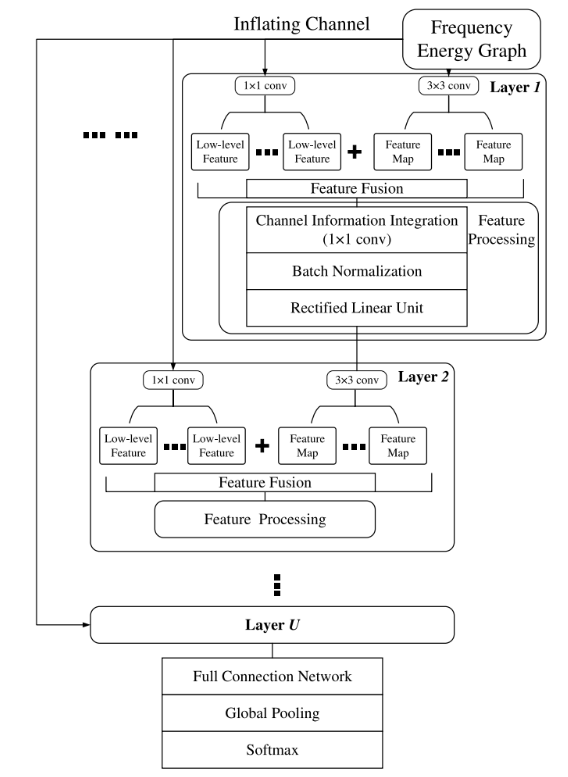

In [ ]:
## tentativo molto approsimativo di riprodurre la rete in A Lightweight Deep Learning Algorithm for WiFi-Based Identity Recognition

#potrebbe essere 
def baloon_layer(input, inflating_channel, n_features):
  feature_maps = tf.keras.layers.Conv2D(filters=n_features, kernel_size=3, padding= 'same', activation='relu')(input)
  low_level_feature = tf.keras.layers.Conv2D(filters=2*n_features, kernel_size=1, activation='relu')(inflating_channel)
  fused_feature = tf.concat([low_level_feature,feature_maps], 3)
  x = tf.keras.layers.Conv2D(filters=fused_feature.shape[3], kernel_size=1)(fused_feature)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.ReLU()(x)
  return x

def final_layer(input, units):
  x = tf.keras.layers.Dense(units)(input)
  x = tf.keras.layers.GlobalMaxPool2D()(x)
  x = tf.keras.layers.Softmax()(x)
  return x

def network(input_shape):
  x_input = tf.keras.Input(input_shape)
  x = baloon_layer(x_input, x_input, 4)
  x = baloon_layer(x_input, x, 8)
  x = baloon_layer(x_input, x, 16)
  x = baloon_layer(x_input, x, 32)
  x = final_layer(x, 5)
  model = tf.keras.Model(inputs = x_input, outputs = x, name='csi_network')
  return model

In [ ]:
model = network(INPUT_NETWORK)
a = model.summary()

Model: "csi_network"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 242, 400, 4  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 242, 400, 8)  40          ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 242, 400, 4)  148         ['input_1[0][0]']                
                                                                                                  
 tf.concat (TFOpLambda)         (None, 242, 400, 12  0           ['conv2d_1[0][0]',     

In [ ]:
parameters = {"feature length": FEATURE_LENGTH,
              "sample length": SAMPLE_LENGTH,
              "num tot": NUM_TOT,
              "batch size": BATCH_SIZE,
              "num people": NUM_PEOPLE,
              "stride len": STRIDE_LEN,
              "learning rate": learning_rate,
              "patience":patience
              }
with open(output_dir_attempt + "parameters.pkl", "wb") as output_file:
    pickle.dump(parameters, output_file)
with open(output_dir_attempt + "info.pkl", "wb") as output_file:
    pickle.dump(parameters, output_file)

In [ ]:
#with tf.device('/GPU:0'):

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model.compile(optimizer=optimizer, loss=loss, metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
num_samples_train = info['num_samples_train']
num_samples_val = info['num_samples_val']
num_samples_test = info['num_samples_test']
lab, count = np.unique(info['labels_train_selected_expanded'], return_counts=True)
lab_val, count_val = np.unique(info['labels_val_selected_expanded'], return_counts=True)
lab_test, count_test = np.unique(info['labels_test_selected_expanded'], return_counts=True)
train_steps_per_epoch = int(np.ceil(num_samples_train/BATCH_SIZE))
val_steps_per_epoch = int(np.ceil(num_samples_val/BATCH_SIZE))
test_steps_per_epoch = int(np.ceil(num_samples_test/BATCH_SIZE))

# def decay_schedule(epoch, lr):
#     if (epoch % 3 == 0) and (epoch != 0):
#         lr = lr * 0.1
#     return lr

# callback_lr = tf.keras.callbacks.LearningRateScheduler(decay_schedule, verbose=1)

callback_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)

name_model = output_dir_attempt + 'network.h5'
callback_save = tf.keras.callbacks.ModelCheckpoint(name_model, save_freq='epoch', save_best_only=False,
                                                    monitor='val_sparse_categorical_accuracy')

results = model.fit(dataset_csi_train, steps_per_epoch=train_steps_per_epoch, 
                    epochs=50, validation_data=dataset_csi_val, 
                    validation_steps=val_steps_per_epoch, callbacks=[callback_save, callback_stop])

Epoch 1/50
861/861 [==============================] - 373s 403ms/step - loss: 0.5969 - sparse_categorical_accuracy: 0.7939 - val_loss: 0.9647 - val_sparse_categorical_accuracy: 0.6570
Epoch 2/50
861/861 [==============================] - 347s 403ms/step - loss: 0.5852 - sparse_categorical_accuracy: 0.7969 - val_loss: 0.9690 - val_sparse_categorical_accuracy: 0.6806
Epoch 3/50
861/861 [==============================] - 347s 402ms/step - loss: 0.5786 - sparse_categorical_accuracy: 0.7983 - val_loss: 0.9462 - val_sparse_categorical_accuracy: 0.6673
Epoch 4/50
861/861 [==============================] - 347s 404ms/step - loss: 0.5674 - sparse_categorical_accuracy: 0.8021 - val_loss: 0.9733 - val_sparse_categorical_accuracy: 0.6741
Epoch 5/50
861/861 [==============================] - 351s 407ms/step - loss: 0.5538 - sparse_categorical_accuracy: 0.8078 - val_loss: 0.9507 - val_sparse_categorical_accuracy: 0.6682
Epoch 6/50
861/861 [==============================] - 351s 407ms/step - loss: 0.

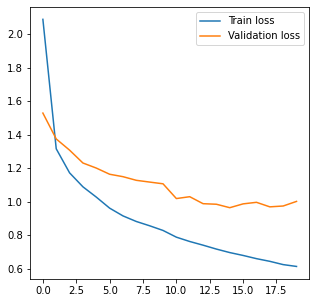

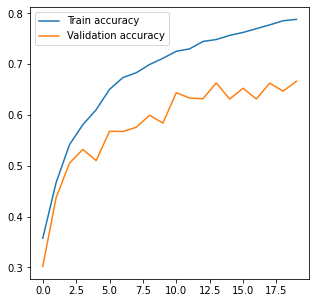

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
loss = ax.plot(np.arange(len(results.history['loss'])),  results.history['loss'])
val_loss = ax.plot(np.arange(len(results.history['val_loss'])),  results.history['val_loss'])
loss[0].set_label("Train loss")
val_loss[0].set_label("Validation loss")
ax.legend()
plt.show()
fig, ax = plt.subplots(1,1,figsize=(5,5))
loss = ax.plot(np.arange(len(results.history['sparse_categorical_accuracy'])),  results.history['sparse_categorical_accuracy'])
val_loss = ax.plot(np.arange(len(results.history['val_sparse_categorical_accuracy'])),  results.history['val_sparse_categorical_accuracy'])
loss[0].set_label("Train accuracy")
val_loss[0].set_label("Validation accuracy")
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# val
val_labels_true = np.array(info['labels_val_selected_expanded'])
val_prediction_list = model.predict(dataset_csi_val, steps=val_steps_per_epoch)[:val_labels_true.shape[0]]

val_labels_pred = np.argmax(val_prediction_list, axis=1)
conf_matrix_val = confusion_matrix(val_labels_true, val_labels_pred)

# test
test_labels_true = np.array(info['labels_test_selected_expanded'])

test_prediction_list = model.predict(dataset_csi_test, steps=test_steps_per_epoch)[:test_labels_true.shape[0]]

test_labels_pred = np.argmax(test_prediction_list, axis=1)

conf_matrix = confusion_matrix(test_labels_true, test_labels_pred)
precision, recall, fscore, _ = precision_recall_fscore_support(test_labels_true,
                                                                test_labels_pred,
                                                                labels=info['labels_considered'])
accuracy = accuracy_score(test_labels_true, test_labels_pred)

279/279 [==============================] - 103s 347ms/step


In [ ]:
output = {"history":results,
          "confusion matrix": conf_matrix,
          "confusion validation matrix": conf_matrix_val,
          "precision":precision,
          "recall":recall,
          "fscore":fscore,
          "accuracy":accuracy
          }

with open(output_dir_attempt + "results.pkl", "wb") as output_file:
    pickle.dump(output, output_file)

In [ ]:
print("Validation confusion matrix:")
print(conf_matrix_val)
print("Test confusion matrix:")
print(conf_matrix)
print("precision:", precision)
print("recall:", recall)
print("fscore:", fscore)
print("accuracy:", accuracy)

Validation confusion matrix:
[[808  40  13   5  26]
 [100 670   0  40  82]
 [243   0 410 113 126]
 [  0   0  20 787  85]
 [ 53 365 134  44 296]]
Test confusion matrix:
[[616 135 140   0   1]
 [ 70 621  35   5 161]
 [128   0 698  18  48]
 [ 47  36 107 474 228]
 [180 249 295  29 139]]
precision: [0.59173871 0.59654179 0.54745098 0.90114068 0.24090121]
recall: [0.69058296 0.69618834 0.78251121 0.53139013 0.1558296 ]
fscore: [0.63735127 0.64252457 0.64420858 0.66854725 0.18924438]
accuracy: 0.5713004484304933


In [ ]:
def read_output(path):
  if (not path.endswith('/')):
    path = path + '/'
  with open(path + 'parameters.pkl', "rb") as fp:
    parameters = pickle.load(fp)
  print(parameters)
  model = tf.keras.models.load_model(path + 'network.h5')
  print(model.summary())
  if not(os.path.exists(path+'results.pkl')):
    with open(path + 'info', "rb") as fp:
      info = pickle.load(fp)
    val_labels_true = np.array(info['labels_val_selected_expanded'])
    val_prediction_list = model.predict(dataset_csi_val, steps=val_steps_per_epoch)[:val_labels_true.shape[0]]
    val_labels_pred = np.argmax(val_prediction_list, axis=1)
    conf_matrix_val = confusion_matrix(val_labels_true, val_labels_pred)
    test_labels_true = np.array(info['labels_test_selected_expanded'])
    test_prediction_list = model.predict(dataset_csi_test, steps=test_steps_per_epoch)[:test_labels_true.shape[0]]
    test_labels_pred = np.argmax(test_prediction_list, axis=1)
    conf_matrix = confusion_matrix(test_labels_true, test_labels_pred)
    precision, recall, fscore, _ = precision_recall_fscore_support(test_labels_true,test_labels_pred,labels=info['labels_considered'])
    accuracy = accuracy_score(test_labels_true, test_labels_pred)
    output = {"history":results,
          "confusion matrix": conf_matrix,
          "confusion validation matrix": conf_matrix_val,
          "precision":precision,
          "recall":recall,
          "fscore":fscore,
          "accuracy":accuracy
          }
    with open(path + "results.pkl", "wb") as output_file:
      pickle.dump(output, output_file)

  with open(path + "results.pkl", "rb") as fp:
    output = pickle.load(fp)
  print("Validation confusion matrix:")
  print(output['confusion validation matrix'])
  print("Test confusion matrix:")
  print(output['confusion matrix'])
  print("precision:", output['precision'])
  print("recall:", output['recall'])
  print("fscore:", output['fscore'])
  print("accuracy:", output['accuracy'])

read_output('/content/drive/MyDrive/HDA_project/output/attempt_010/')

{'feature length': 400, 'sample length': 242, 'num tot': 4, 'batch size': 16, 'num people': 5, 'stride len': 10, 'learning rate': 2e-05, 'patience': 5}
Model: "csi_network"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 242, 400, 4  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 242, 400, 8)  40          ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 242, 400, 4)  148         ['input_1[0][0]']                
                                   